In [1]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

## 데이터 가져오기
- dataset : 강원도 여행지 / 2019,2020,2021,2022 년의 겨울 데이터(12,1,2월)

In [2]:
# 강원도 연도별 겨울(12,1,2월) 데이터 csv를 가져옴
df_1 = pd.read_csv("2019_2020.csv", encoding='cp949')
df_2 = pd.read_csv("2020_2021.csv", encoding='cp949')
df_3 = pd.read_csv("2021_2022.csv", encoding='cp949')
df_4 = pd.read_csv("2022_2023.csv", encoding='cp949')

df_winter = pd.concat([df_1, df_2, df_3, df_4])
df_winter

,순위,분류,관련 키워드,언급건수
0,1,휴식/힐링,힐링,27888
1,2,레포츠,스키,23244
2,3,레포츠,등산,11998
3,4,레포츠,낚시,10538
4,5,레포츠,캠핑,8225
...,...,...,...,...
369,348,휴식/힐링,카캉스,1
370,348,체험,향수체험,1
371,348,체험,교복체험,1
372,348,체험,학생승마체험,1


## 데이터 분석
- 레포츠에서 어떤 키워드에 대한 언급량 수가 많은지 판단


In [3]:
df_winter.query("분류 == '레포츠'")

,순위,분류,관련 키워드,언급건수
1,2,레포츠,스키,23244
2,3,레포츠,등산,11998
3,4,레포츠,낚시,10538
4,5,레포츠,캠핑,8225
5,6,레포츠,산행,7796
...,...,...,...,...
355,348,레포츠,암벽산행,1
356,348,레포츠,블롭점프,1
357,348,레포츠,스킨스쿠버다이빙,1
362,348,레포츠,cmas,1


In [4]:
df_leisure =  pd.DataFrame(df_winter.query("분류 == '레포츠'").groupby("관련 키워드")["언급건수"].sum()).sort_values(by='언급건수', ascending=False)
df_leisure[:10]

,언급건수
관련 키워드,
스키,81564
등산,55248
캠핑,50557
산행,33403
낚시,31594
서핑,21480
트레킹,13946
레저,13095
차박,10396


In [5]:
list_type = df_leisure.index[:10].to_list()
list_mention = df_leisure["언급건수"][:10].to_list()

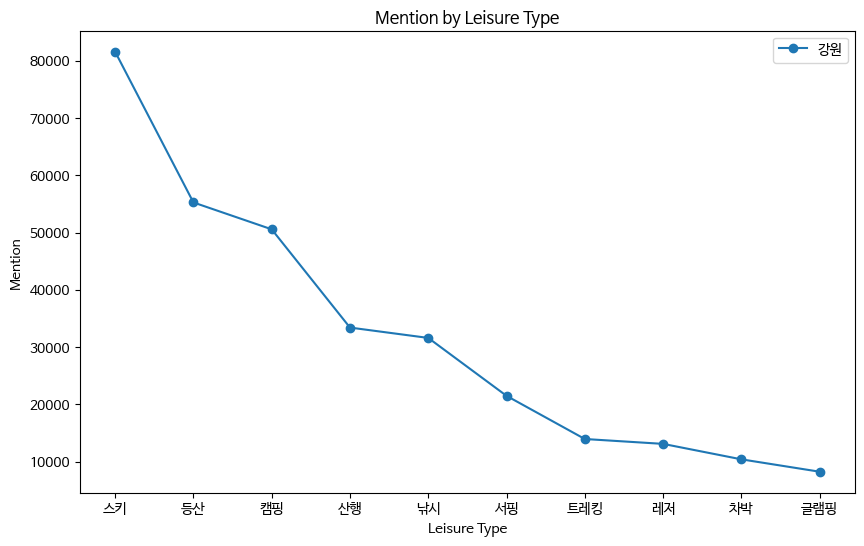

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(list_type, list_mention, marker='o', label='강원')
plt.xlabel('Leisure Type')
plt.ylabel('Mention')
plt.title('Mention by Leisure Type')
plt.legend() #범례
plt.show()

[Text(0.5, 0, 'Leisure Type'), Text(0, 0.5, 'Mention')]

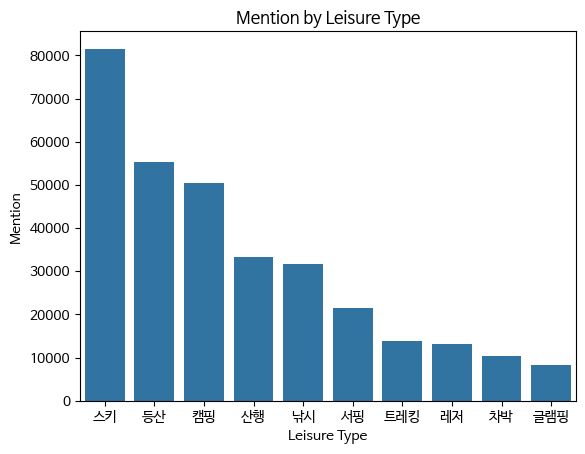

In [7]:
# seaborn의 barplot을 사용하여 그래프를 나타냅니다.
ax = sns.barplot(x=list_type, y=list_mention)

# 차트 제목 설정
ax.set_title('Mention by Leisure Type')

# x, y 축 레이블 설정
ax.set(xlabel='Leisure Type', ylabel='Mention')

## 인사이트

- 분석 결과
    + 레포츠 타입 중 스키에 관한 데이터가 가장 많았고, 등산, 캠핑이 차례대로 2위, 3위를 차지했다.
    + 낚시, 서핑, 글램핑 같은 분류 기준들도 있었음.
- 마케팅 방향성
    + 수치가 높은 레포츠에 대한 내용을 패키지 여행 상품구성에 추가하고자 함.
    + 따라서 스키, 등산, 캠핑 등에 대한 내용을 적용.